## Classification Algorithms

What a right classification algorithm will be for a particular problem requires practice, exprience and with that a good understanding of how data looks like to decide what algoirthm(s) should be tried, as each algorithm has its own quirks and underlying assumptions. No single classifier can work for all the scenarios.

In practice, one will compare the performance of few classifiers to select the best model for a particular problem. These may differe based on many factors like, number of training examples, number of features, noise in the dataset and whether the classes are linearly separable or not

The five main steps for any machine learning algorithm can be summarized as below:
* Collecting labeled training examples, and identifying analyzing the features
* Chosing a performance metrics
* Chosing a Learning Algorithm and training a learning algorithm
* Evaluating the performance of the algorithm and tuning the model.

For each of these group of activities, we can use the library scikit-learn, and in this notebook and few to follow will will get into the hood of scikit-learn and understand how it can be used to effectively solve machine learning problems.

In the first part we will use scikit-learn to check various Classifier Algorithms, and see how can we use them to train on the data, and in the later sections we will go into the details of feature selection, preprocessing etc.

### Training a Perceptron with scikit-learn

In [20]:
#Import IRIS dataset
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [12]:
iris = datasets.load_iris()
print(iris.data.shape, iris.target.shape)
target_names=iris.target_names

(150, 4) (150,)


In [13]:
#We will only use Petal Length and Petal Width (columns index 2 and 3) as the features to assess
X = iris.data[:,[2,3]]
y = iris.target
print(f'Class Labels in the Training Dataset are: {np.unique(y)} and corresponding Label Names are: {target_names}')

Class Labels in the Training Dataset are: [0 1 2] and corresponding Label Names are: ['setosa' 'versicolor' 'virginica']


Note that we have have both class label as integer values stored in array __y__, and the class label names stored in __target_names__, for training the algorithm we will use the integer classes.

Now we will split the dataset into training and test dataset using scikit-learn's inbuilt function __train_test_split()__ for this purpose

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

NOTE that by passing the parameters __stratify=y__, we will maintain the class ratio in the original set and train and test splits that we have created

In [19]:
print(f'Label Counts in y: {np.bincount(y)}')
print(f'Label Counts in the Train Set y_train: {np.bincount(y_train)}')
print(f'Label Counts in the Test Set y_test: {np.bincount(y_test)}')

Label Counts in y: [50 50 50]
Label Counts in the Train Set y_train: [35 35 35]
Label Counts in the Test Set y_test: [15 15 15]


We will also do the feature scaling using the class __StandardScaler__ provided by scikit-learn. Standardizing the features will assit in the performance of learning algorithm

In [22]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Note that we have first transformed the training dataset, to standardize it using the __fit__ method of class StandardScaler. Once the instance of class has learned the parameters required for standardization 

In [26]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

Now that we have trained the model using __fit__ method, we are now able to make predictions and compare it agains the actual labels and check how performant our model is

In [27]:
y_pred = ppn.predict(X_test_std)

In [38]:
print(f'Misclassified Examples : {(y_test != y_pred).sum()} which is equal to {(y_test != y_pred).sum()/len(y_test) * 100 : .2f}%')

Misclassified Examples : 1 which is equal to  2.22%


__scikit_learn__ has large number of performance metrics already implemented and we can use that as well, for e.g. classification accuracy of the perceptron trained above can also be calculated as follows:

In [40]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_pred, y_test):0.3f}%')

Accuracy: 0.978%


We can now plot the decision_regions, and also the highlight the elements from test dataset in a different way.

In [62]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y, classifier, test_idx=None, resolution=0.02):
    #setup marker generator and color maps
    markers = ('o', 's', '^','v','<')
    colors = ('red','blue','green','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot the decision surface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),
                         np.arange(x1_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2,lab,alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    #plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x = X[y==cl,0],
            y = X[y==cl,1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            edgecolor='black',
            label=f'Class {idx}: {target_names[idx]}'
        )
    # highlight test examples
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='none', edgecolor='black', alpha=0.4,
                    linewidth=1, marker='o', s=100, label='Test Set')


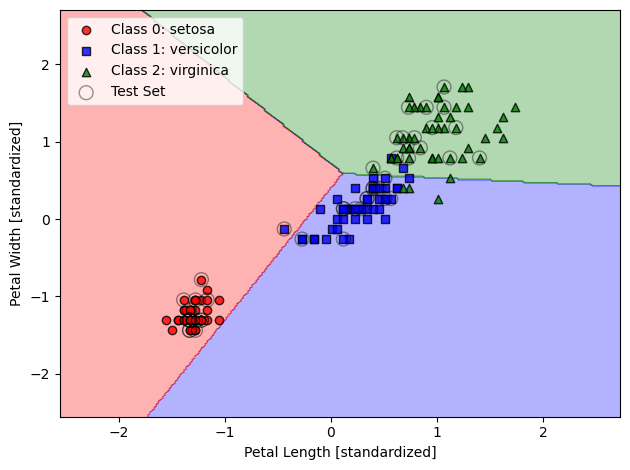

In [63]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

### Modeling Class Probabilities using Logistic Regression